In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster

**Download data from https://data.nashville.gov/General-Government/Zip-Codes/u7r5-bpku to have zipcode outlines

In [2]:
zipcodes = gpd.read_file('../data/zipcodes.geojson')
print(zipcodes.crs)
zipcodes.head( )

epsg:4326


,zip,objectid,po_name,shape_stlength,shape_starea,geometry
0,37115,1,MADISON,178783.02488886821,596553400.57885742,"MULTIPOLYGON (((-86.68725 36.31821, -86.68722 ..."
1,37216,3,NASHVILLE,75820.997821400058,188884682.28344727,"MULTIPOLYGON (((-86.73451 36.23774, -86.73425 ..."
2,37204,9,NASHVILLE,93180.292250425613,200664795.51708984,"MULTIPOLYGON (((-86.77914 36.13424, -86.77923 ..."
3,37027,11,BRENTWOOD,159760.6942933173,174978422.04101562,"MULTIPOLYGON (((-86.81258 36.06319, -86.81263 ..."
4,37064,18,FRANKLIN,28995.828320601937,46969608.005737305,"MULTIPOLYGON (((-87.02197 36.01200, -87.02140 ..."


**Call and print geometry variable

In [3]:
type(zipcodes)


geopandas.geodataframe.GeoDataFrame

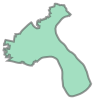

In [4]:
zipcodes.loc[0, 'geometry']

In [5]:
print(zipcodes.loc[0, 'geometry'])

MULTIPOLYGON (((-86.68724897141 36.318212121092, -86.687216475338 36.318210560887, -86.687181702435 36.318208780693, -86.68714696276101 36.318206917893, -86.68711218725601 36.318205000347, -86.687077445444 36.318202972151, -86.687042702928 36.318200862685, -86.68703469075101 36.318200362824, -86.687007959928 36.318198697129, -86.68697325063 36.318196422067, -86.686938539918 36.318194065167, -86.68690382778099 36.318191625285, -86.68686914958001 36.318189102792, -86.68683443743301 36.318186498074, -86.6867997571 36.318183810757, -86.686765111412 36.318181040826, -86.686730430357 36.318178188106, -86.686695782299 36.318175225883, -86.68666116771 36.318172208522, -86.686626552408 36.318169108746, -86.686591935688 36.318165926561, -86.68655731872499 36.318162634491, -86.686522735235 36.318159287854, -86.68648815149901 36.318155830759, -86.686453600524 36.318152318529, -86.68641904813001 36.31814872389, -86.68638449549 36.318145018792, -86.686349976324 36.318141259129, -86.68631549014999 36

**Plot GeoDataframe and personalize with styling options

<AxesSubplot:>

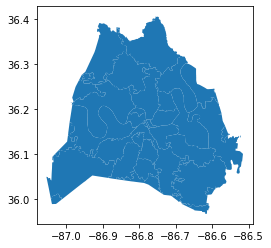

In [6]:
zipcodes.plot()

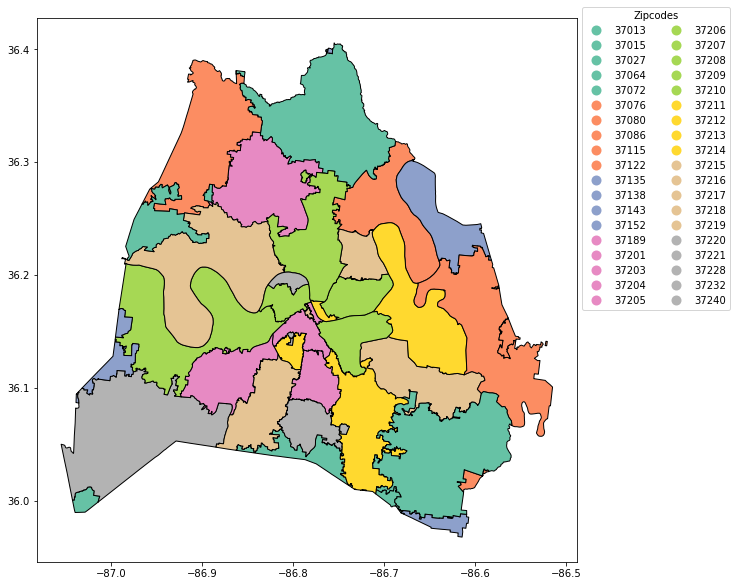

In [7]:
leg_kwds = {'title': 'Zipcodes', 'loc': 'upper left', 
            'bbox_to_anchor': (1, 1.03), 'ncol': 2}

zipcodes.plot(column = 'zip', figsize=(10, 10),
              edgecolor = 'black',
              legend = True, legend_kwds = leg_kwds, 
              cmap = 'Set2')
plt.show()

**Download data from https://data.nashville.gov/Transportation/Regional-Transportation-Authority-Bus-Stops/p886-fnbd to load bus stops

In [8]:
bus_stops = pd.read_csv('../data/busstops_cleaned.csv')
print(bus_stops.shape)
bus_stops.head(3)

(2524, 5)


,stop,route,location,lat,lng
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004


In [9]:
bus_stops.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2524 entries, 0 to 2523
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   stop      2524 non-null   object 
 1   route     2524 non-null   object 
 2   location  2524 non-null   object 
 3   lat       2524 non-null   float64
 4   lng       2524 non-null   float64
dtypes: float64(2), object(3)
memory usage: 98.7+ KB


**Create a GeoDataFrame of bus stops, create  a new point data type column - geometry

In [10]:
bus_stops['geometry'] = bus_stops.apply(lambda x: Point((x.lng, 
                                                         x.lat)), 
                                        axis=1)
bus_stops.head(3)

,stop,route,location,lat,lng,geometry
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.816722 36.236249)
1,_ 9TH AVE S & EDGEHILL AVE SB,8TH AVENUE SOUTH,"(36.142642, -86.780897)",36.142642,-86.780897,POINT (-86.780897 36.142642)
2,DONELSON/DELL STATION OUTBOUND,MURFREESBORO PIKE,"(36.105615, -86.672004)",36.105615,-86.672004,POINT (-86.672004 36.105615)


**The CRS for the bus stops to match the CRS in the zipcodes GeoDataFrame

In [11]:
zipcodes.crs


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

**Spatially joining the bus stops(bus_geo) and zip codes (zipcodes)

In [12]:
bus_geo = gpd.GeoDataFrame(bus_stops, 
                           crs = zipcodes.crs, 
                           geometry = bus_stops['geometry'])

'''The GeoDataFrame() constructor needs 3 parameters:
a DataFrame
a coordinate reference system
a geometry'''

In [13]:
type(bus_geo)


geopandas.geodataframe.GeoDataFrame

In [14]:
zipcodes = zipcodes[['zip', 'po_name', 'geometry']]


In [15]:
stops_by_zip = gpd.sjoin(bus_geo, zipcodes, op = 'within')

In [16]:
stops_by_zip.head()


,stop,route,location,lat,lng,geometry,index_right,zip,po_name
0,GREEN LN & WHITES CREEK PIKE WB,GOLDEN VALLEY,"(36.236249, -86.816722)",36.236249,-86.816722,POINT (-86.81672 36.23625),18,37189,WHITES CREEK
976,OLD HICKORY BLVD & COBBLESTONE CREEK DR EB,HICKORY HILLS,"(36.278199, -86.789015)",36.278199,-86.789015,POINT (-86.78902 36.27820),18,37189,WHITES CREEK
1668,WHITES CREEK HIGH SCHOOL,HICKORY HILLS,"(36.276203, -86.819009)",36.276203,-86.819009,POINT (-86.81901 36.27620),18,37189,WHITES CREEK
2161,GREEN LN & KNIGHT DR WB,GOLDEN VALLEY,"(36.236813, -86.803848)",36.236813,-86.803848,POINT (-86.80385 36.23681),18,37189,WHITES CREEK
2483,OLD HICKORY BLVD & COBBLESTONE CREEK DR WB,HICKORY HILLS,"(36.278342, -86.788981)",36.278342,-86.788981,POINT (-86.78898 36.27834),18,37189,WHITES CREEK


**Calculating the Number of bus stops at each zip codes

In [17]:
stops_by_zip['zip'].value_counts()


37207    272
37203    237
37206    205
37211    174
37208    165
37209    149
37210    141
37217    121
37115    106
37013    103
37204     90
37216     88
37214     87
37212     86
37218     83
37215     53
37205     52
37076     50
37219     48
37221     45
37201     36
37138     32
37228     27
37213     10
37027      9
37072      7
37189      5
37240      4
Name: zip, dtype: int64

**Reviewing the bus stops in the 37013 zip code/Antioch area

In [18]:
stops_in_37013 = stops_by_zip.loc[stops_by_zip['zip'] == '37013']
stops_in_37013.shape

(103, 9)

In [19]:
polygon37013 = zipcodes.loc[zipcodes['zip']=='37013']
polygon37013.shape

(1, 3)

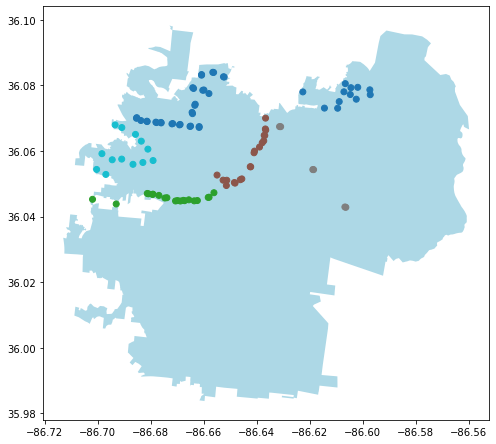

In [21]:
ax = polygon37013.plot(figsize = (8, 10), color = 'lightblue')
stops_in_37013.plot(ax = ax, column='route')
plt.show();

**Adding street names within zip codes, finding the center of the polygon

In [22]:
polygon37013.geometry.centroid


C:\Users\jojuk\AppData\Local\Temp/ipykernel_816/1302094123.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  polygon37013.geometry.centroid


51    POINT (-86.63636 36.04177)
dtype: geometry

In [24]:
center = polygon37013.geometry.centroid[51]
print(center)

POINT (-86.63635924054336 36.04176675016873)


C:\Users\jojuk\AppData\Local\Temp/ipykernel_816/2641159599.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  center = polygon37013.geometry.centroid[51]


**Folium requires a location point as an array with latitude first however shapely Points display longitude first

In [25]:
# reverse the order when constructing the array for folium location
area_center = [center.y, center.x]

# check the order of area_center, the location for our folium map
print(area_center)

[36.04176675016873, -86.63635924054336]


**Create a folium map

In [27]:
map_37013 = folium.Map(location = area_center, zoom_start=12)
map_37013

**Loop through GeoDataFrame to find information (row id and values) of bus stops in 37013 that will be used to create markers

In [28]:
i = 0
for row_index, row_values in stops_in_37013.iterrows():
    if i <3: 
        print('index is', row_index)
        print('values are:')
        print(' ')
        print(row_values)
        print('------------------------- ')
        i+=1

index is 15
values are:
 
stop                   SHAKERTOWN RD & DAISY TRL SB
route                               ANTIOCH EXPRESS
location                    (36.077159, -86.597214)
lat                                       36.077159
lng                                      -86.597214
geometry       POINT (-86.59721399999999 36.077159)
index_right                                      51
zip                                           37013
po_name                                     ANTIOCH
Name: 15, dtype: object
------------------------- 
index is 45
values are:
 
stop           BELL RD & MORRIS GENTRY BLVD SB
route                        MURFREESBORO PIKE
location               (36.066713, -86.636764)
lat                                  36.066713
lng                                 -86.636764
geometry          POINT (-86.636764 36.066713)
index_right                                 51
zip                                      37013
po_name                                ANTIOCH
Name: 

**Define map outline for Antioch area/37013 zipcode and denote bus stops within that zipcode with popup markers

In [31]:
#draw our zip code area: 37013
map_37013 = folium.Map(location =  area_center, zoom_start = 12)

folium.GeoJson(polygon37013).add_to(map_37013)

#iterate through stops_in_37013 to create locations and markers 
#for each bus stop
#remember for Folium locations, lat is listed first!!

for row_index, row_values in stops_in_37013.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop, icon = icon) 

    marker.add_to(map_37013)
map_37013.save('../maps/map37013.html')

#display our map
map_37013

**Combine the variuos bus stops for Antioch area/37013 zipcode to display only marker clusters

In [32]:
cluster_map_37013 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37013)

folium.GeoJson(polygon37013).add_to(cluster_map_37013)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37013.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37013.save('../maps/cluster37013.html')

cluster_map_37013 

**Saving our map as an html file so that it will retain the interactive qualities

In [34]:
folium.Map?


In [36]:
cluster_map_37013 = folium.Map(location =  area_center, zoom_start = 12)

#create a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map_37013)

folium.GeoJson(polygon37013).add_to(cluster_map_37013)

# inside the loop add each marker to the cluster
for row_index, row_values in stops_in_37013.iterrows():
    loc = [row_values['lat'], row_values['lng']]
    pop = str(row_values['route'])
    icon=folium.Icon(color="blue",icon="bus", prefix='fa')
    
    marker = folium.Marker(
        location = loc, 
        popup = pop,
    icon = icon) 
    
    marker.add_to(marker_cluster)

    
#save an interactive HTML map by calling .save()
cluster_map_37013.save('../maps/cluster37013.html')

cluster_map_37013